
# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>






<a id='intro'></a>
# Introduction

> This document is made for dataset `***encrypted.csv`. In <a href="#wrangling">Data Wrangling</a> part, The quality and tidiness issue have been addressed and cleaned. In <a href="#eda">Exploratory Data Analysis</a> part, the features have been discussed one by one. And customer preference has shown in <a href="#type">type, color and material exploratory</a>.


## QNA:

###  **What are major features worth of exploring in this dataset?**

#### 1. Catogorical features:

**Catogorical variables:**
> - `fulfillment_status`
> - `financial_status`
> - Product Types: `lineitem_type`, `lineitem_color`, `lineitem_material`
> -Adresses: `billing_city`, `billing_province`, `billing_country`, `shipping_city`, `shipping_province`, `shipping_country`
> - `risk_level`

**Binary variables:**
> - `accepts_marketing`
> - `lineitem_taxable`


#### 2. Numerical features:
**Continuous varibles:**
> - Payment amount:
> Payment amount include `subtotal`, `shipping`, `total`, `lineitem_price` and `refunded_amount`.


> - Time Series: 
> `paid_at`, `fulfilled_at`, `created_at` and  `cancelled_at`.


**Discrete variables:**
> - `lineitem_quantity`
       
       
### **What features have NO need to explore in this dataset?**

> In this dataset, we actually have some columns that recorded a single value or recorded the same thing as the other column. They are redundant column and the single value can be recorded seperately. They are:

> - Currency: `USD`
> - Discount Amount: `0.0`
> - Taxes: `0.0`
> - Shipping Method: `encrypted`  
> - payment method: `encrypted`
> - Lineitem requires shipping: `True`
> - lineitem fulfillment status: The same as fulfillment status.
> - Note attributes: Only one default record contains in `note_attributes`, which is 
`encrypted` And its lineitem name is: `encrypted`. As we eliminate the special case in our cleaned dataset later in data wrangling part, this column becomes redundant for us to do exploration.
> - Lineitem name and Lineitem sku: As we already convert them to type, color and material columns, they become redundant.
       
   
    

### **What kind of products it contains in this dataset?**

>    - It actually contains two major types of products. 
        - 001: Encrypted
        - 002: Encrypted
    - For product 001, it can be classified by colors or materials.
        - Color: 
            - E-white : WH
            - Black : BA
            - Grey : GY
            - Rose Gold : RG
            - Blue : BU
            - Green : GN
        - Material:
            - Polycarbonate : PO
            - Aluminum : AL
    - For product 002, it can be classified by materials.
        - Material:
            - Polycarbonate : PO
            - Aluminum : AL



In [1]:
# import statements for all of the packages.
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

## Data Accessing and Cleaning

### Tidiness and Quality issues:
##### 1. Columns names issue:
> - In order to munipulate the dataset easier in Python, I renamed every column by setting them all lowercase, and eliminated the blanks, using a `_` to connect words instead.

##### 2. Records with missing important features:
> - We see that some important features (such as `financial_status`, `fulfillment_status`, and `total`) have 785 records(rows) whereas some of them (such as `lineitem_name` and `lineitem_price`) have 900 records. For those records without financial status or payment information, they are unnessesary even **misleading** to be explored and will be deleted.

##### 3. Three features in two columns:
> - There are two columns that record the type, color and materials of products. That is, `lineitem_name` and `lineitem_sku`. In fact, the two columns recorded the same thing. They match each other by following ways:

>   - type: 
     - encrypted: 001
     - encrypted: 002
         
>   - color:
      - E-white : WH
      - Black : BA
      - Grey : GY
      - Rose Gold : RG
      - Blue : BU
      - Green : GN

>   - materials:
      - Polycarbonate : PO
      - Aluminum : AL
      
> I'd like to convert those two columns to three new columns: `lineitem_type`, `lineitem_color`, and `lineitem_material`.

> There are three type of products which don't follow the above pattern, and do not contribute to profit. I will delete them from the dataset. Their behavior can be explored individually since they only count 6 records in total. They are:

>  - encrypted   (3 records)
>  - encrypted   (2 records)
>  - encrypted   (1 records)

##### 4. Redundant columns:
> In this dataset, we actually have some columns that recorded a single value or recorded the same thing as the other column. They are redundant column and the single value can be recorded seperately. They are:

> - Currency: `USD`
> - Discount Amount: `0.0`
> - Taxes: `0.0`
> - Shipping Method: `encrypted`  
> - payment method: `encrypted`
> - Lineitem requires shipping: `True`
> - lineitem fulfillment status: The same as fulfillment status.
> - Note attributes: Only one default record contains in `note_attributes`, which is 
`encrypted` And its lineitem name is: `encrypted`. Since we eliminate the special case in our cleaned dataset, this column becomes redundant for us to do exploration.
> - Lineitem name and Lineitem sku: As we already convert them to type, color and material columns, they become redundant.




#### Data Gathering

In [2]:
#read the .csv dataset
df1 = pd.read_csv('Q4_Batch1_Encryped.csv')

#### Data Accessing

In [3]:
#encrypted
#df1.head(1)

In [4]:
#rename the headers
df1.rename(columns = lambda x: x.strip().lower().replace(' ','_'),inplace = True)

In [5]:
#eliminate the empty financial_status rows.
df1 = df1[df1.financial_status.notnull()]

#### Convert the columns:
> Convert `lineitem_name` and `lineitem_sku` to three new columns: `lineitem_type`, `lineitem_color`, and `lineitem_material`.


> take a look at the original `lineitem_sku` column:

In [6]:
#take a look at the original lineitem_sku column
#df1.lineitem_sku.value_counts() #encrypted

> take a look at the original `lineitem_name` column:

In [7]:
#take a look at the original lineitem_name column
#df1.lineitem_name.value_counts() #encrypted

> convert the two columns to three new columns: `lineitem_type`, `lineitem_color` and `lineitem_material`

In [8]:
#convert those two column to three new columns
new = df1.lineitem_sku.str.split("-", n = 2, expand = True) 
new = new[(new[0] == '001') | (new[0] == '002')]
df1['lineitem_type'] = new[0]
df1['lineitem_color'] = new[(new[1] != 'AL') & (new[1] != 'PO')][1]
df1['lineitem_material'] = new.apply(lambda x: 'AL' if ((x[1] == 'AL') | (x[2] == 'AL')) else ('PO' if ((x[1] == 'PO') | (x[2] == 'PO')) else None), axis = 1)
df1 = df1[df1.lineitem_type.notnull()]


In [9]:
df = df1.drop(['lineitem_name','lineitem_sku','currency', 'discount_amount', 'taxes', 'shipping_method', 'payment_method','lineitem_requires_shipping','lineitem_fulfillment_status','note_attributes'], axis = 1)

<a id='eda'></a>
## Exploratory Data Analysis

#### Export the cleaned dataset to cleaned_Q4_Batch1_Encryped.csv file


In [10]:
df.to_csv('cleaned_Q4_Batch1_Encryped.csv')


#### In this exploratory data analysis part, we discuss all features contained in the cleaned table one by one. Following the order below:

**1. Catogorical features:**

Catogorical variables:
> - `fulfillment_status` <a href="#fulfilled">fulfillment_status</a>
> - `financial_status` <a href="#financial">financial_status</a>
> - Product Types: `lineitem_type`, `lineitem_color`, `lineitem_material` <a href="#type">product types</a>

> -Addresses: `billing_city`, `billing_province`, `billing_country`, `shipping_city`, `shipping_province`, `shipping_country` <a href="#address">addresses</a>
> - `risk_level` <a href="#risk">risk_level</a>

Binary variables:
> - `accepts_marketing` <a href="#marketing">accepts_marketing</a>
> - `lineitem_taxable` <a href="#taxable">lineitem_taxable</a>


**2. Numerical features:**

Continuous varibles:
> - Payment amount:
> Payment amount include `subtotal`, `shipping`, `total`, `lineitem_price` and `refunded_amount`.


> - Time Series: 
> `paid_at`, `fulfilled_at`, `created_at` and  `cancelled_at`.<a href="#time">time_series</a>


Discrete variables:
> - `lineitem_quantity` <a href="#quantity">lineitem_quantity</a>
       

### 1. Catogorical features:

**Catogorical variables:**
<a id='financial'></a>
> - `financial_status`

> From the table shown below, we see most of orders are paid, and only 20 orders requires refunding. As we only have a few records as refund orders, it's a good sign that the refund rate is pretty low. In fact, the refund rate is 0.02567. 

> Meanwhile, limited records of refunded order also bring challenge for us to find the features that leads to **refunding**. but we could still found some customer preference based on the paid orders.

In [11]:
df.financial_status.value_counts()

paid                  759
refunded               14
partially_refunded      6
Name: financial_status, dtype: int64

In [12]:
refund_rate = (len(df) - len(df.query('financial_status == "paid"')))/len(df)
print(f'Refund rate is {{:.4}}'.format(refund_rate))

Refund rate is 0.02567


<a id='fulfilled'></a>
> - `fulfilled_status`

>  Most(756) of paid orders are **fulfilled** with only 3 unfulfilled.

>  Most(5) of partially_refunded orders are **unfulfilled** with only 1 fulfilled.

>  All(14) of refunded orders are **unfulfilled**.

In [13]:
df.fulfillment_status.value_counts()

fulfilled      757
unfulfilled     22
Name: fulfillment_status, dtype: int64

In [14]:
df.groupby('financial_status').fulfillment_status.value_counts()

financial_status    fulfillment_status
paid                fulfilled             756
                    unfulfilled             3
partially_refunded  unfulfilled             5
                    fulfilled               1
refunded            unfulfilled            14
Name: fulfillment_status, dtype: int64

<a id='type'></a>
> - Product Types: `lineitem_type`, `lineitem_color`, `lineitem_material`

> 1. `lineitem_type`

> We can see 653 orders are type-001 and 126 orders are type-002. From here we can definitely say customers prefer `type-001`. Next we can explore more on different type of products separately to see more detailed preference.

In [15]:
df.lineitem_type.value_counts()

001    653
002    126
Name: lineitem_type, dtype: int64

<a id='refund_rate'></a>

> What about the refund rate in different type of product?

> Type-001 has only 1.225% of refund rate while Type-002 has 9.524% of refund rate. 

In [16]:
df1.groupby('financial_status').lineitem_type.value_counts()

financial_status    lineitem_type
paid                001              645
                    002              114
partially_refunded  001                5
                    002                1
refunded            002               11
                    001                3
Name: lineitem_type, dtype: int64

In [17]:
# refund rate of type 001
r_rf_001 = len(df1.query('((financial_status == "partially_refunded")|(financial_status == "refunded")) & lineitem_type == "001"'))/len(df1.query('lineitem_type == "001"'))
print(f'Refund rate of type 001 is {{:.4}}'.format(r_rf_001))


Refund rate of type 001 is 0.01225


In [18]:
# refund rate of type 002
r_rf_002 = len(df1.query('((financial_status == "partially_refunded")|(financial_status == "refunded")) & lineitem_type == "002"'))/len(df1.query('lineitem_type == "002"'))
print(f'Refund rate of type 002 is {{:.4}}'.format(r_rf_002))

Refund rate of type 002 is 0.09524


> 2. `lineitem_color`

> For type 001 product, it has 6 colors to be sold. WH(white), BA(black), GY(grey), GR(red), BU(blue), and GN(green).

> From the bar chart below, it's obviously that the white keyboard sold the best. Then Black and Grey. The colored Red, Blue and Green are behind. 



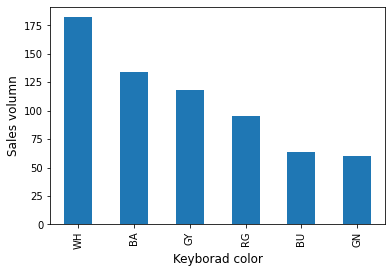

In [19]:
ax = df1.query('lineitem_type == "001"').lineitem_color.value_counts().plot(kind = 'bar');
ax.set_xlabel('Keyborad color', size = 12);
ax.set_ylabel('Sales volumn', size = 12);

> 3. `lineitem_material`

> For both type001 and type002, their materials are two kinds: PO(Polycarbonate) and AL(Aluminum).

> The chart below shows the volumn represent different materials and types. 

> For type001 perchases, customer prefer `Aluminum` material. 

> For type002 perchases, customer haven't shown any preference on materials.

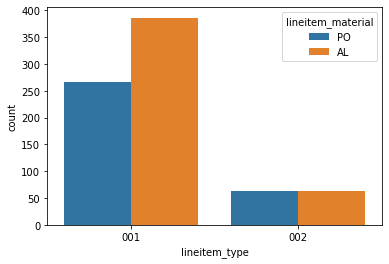

In [20]:
sb.countplot(data = df, x = 'lineitem_type', hue = 'lineitem_material');

<a id='address'></a>
> - Addresses: `billing_city`, `billing_province`, `billing_country`, `shipping_city`, `shipping_province`, `shipping_country`

> First thing I find is, most of the billing country are the same as shipping country. Only 4 of them didn't match. However, when query the records that billing province is not the same as shipping province, it shows there is 100 records, which is greater than the number of records (= 43) that the billing_city is not the same as shipping city. In fact, it shouldn't happen in real world, as city are the subclass of province. So we may need to check the system deficiency.


In [21]:
len_country = len(df.query('billing_country != shipping_country'))
print('number of records that shipping country and billing country don\'t match: {}'.format(len_country))

number of records that shipping country and billing country don't match: 4


In [22]:
len_prov = len(df.query('billing_province != shipping_province'))
print('number of records that shipping country and billing country don\'t match: {}'.format(len_prov))

number of records that shipping country and billing country don't match: 100


In [23]:
len_city = len(df.query('billing_city != shipping_city'))
print('number of records that shipping country and billing country don\'t match: {}'.format(len_city))

number of records that shipping country and billing country don't match: 43


> Let's take a look at the map of orders. VN is the country with most of orders, US the second.


<img src="map.png" width="600" height="400">

<a id='risk'></a>
> - `risk_level`

> In fact, The risk_level of all the `refunded` orders are marked as `low`. In this case, We can't connect the high risk level with high refund rate. 

In [24]:
df.risk_level.value_counts()

Low       766
High        8
Medium      5
Name: risk_level, dtype: int64

In [25]:
df.groupby('financial_status').risk_level.value_counts()

financial_status    risk_level
paid                Low           746
                    High            8
                    Medium          5
partially_refunded  Low             6
refunded            Low            14
Name: risk_level, dtype: int64

**Binary variables:**

<a id='marketing'></a>
> - `accepts_marketing`

> - Only 10 customers choose `accepts Marketing`. And they are all `paid` orders.
> - For partially_refunded and refunded orders, **NO** one choose `accepts Marketing`.

In [26]:
df1.accepts_marketing.value_counts()

no     769
yes     10
Name: accepts_marketing, dtype: int64

In [27]:
df1.groupby('accepts_marketing').financial_status.value_counts()

accepts_marketing  financial_status  
no                 paid                  749
                   refunded               14
                   partially_refunded      6
yes                paid                   10
Name: financial_status, dtype: int64

<a id='taxable'></a>
> - `lineitem_taxable`

> For not-taxable lineitem orders, the refund rate is 0.01225. 

> For taxable lineitem orders, the refund rate is 0.09523.

> We might say `the taxable lineitem orders has much higher refund rate than not-taxable lineitems`. 

In [28]:
df.lineitem_taxable.value_counts()

False    653
True     126
Name: lineitem_taxable, dtype: int64

In [29]:
df.groupby('lineitem_taxable').financial_status.value_counts()

lineitem_taxable  financial_status  
False             paid                  645
                  partially_refunded      5
                  refunded                3
True              paid                  114
                  refunded               11
                  partially_refunded      1
Name: financial_status, dtype: int64

### 2. Numerical features:

**Continuous varibles:**

> - Payment amount:
> Payment amount include `subtotal`, `shipping`, `total`, `lineitem_price` and `refunded_amount`.

> `total` = `subtotal` + `shipping`


<a id='time'></a>
> - Time Series: 
> `paid_at`, `fulfilled_at`, `created_at` and  `cancelled_at`.
>    - All Time series variables are not real-time. They were recorded grouply which can't show the underlying patterns beneath the time series analysis.
>    - `Created at` and `Paid at` are almost the same. The majority of them are recorded grouply at the noon of 11/14/20. 3 records of them are happened around 3am of 11/16/20.
>    - For `cancelled_at` column, The records are quiet few and didn't show any patterns. They are all made after midnight. Most of them are around 3am so I believe it's not the real cancelled time made by customer or those records are made in such short-time period, or they are selected with bias.
>    - For `fulfilled_at` column, the timestamps are grouped together as well and most of them clustered at 1am 26/12/2020. In reality, the orders won't be clustered that much as the picture shows. It must be system deficiency that causes the inaccuracy.
>    - Based on all those evidences, time series analysis is not applied in this dataset.

In [30]:
df.paid_at.value_counts()  

11/14/20 12:01    335
11/14/20 12:02    275
11/14/20 12:03     42
11/14/20 12:04     22
11/14/20 12:05     13
11/16/20 3:12       1
11/16/20 3:19       1
11/16/20 3:18       1
Name: paid_at, dtype: int64

In [31]:
df.created_at.value_counts()

11/14/20 12:01    358
11/14/20 12:02    262
11/14/20 12:04     58
11/14/20 12:05     49
11/14/20 12:03     47
11/14/20 12:06      2
11/16/20 3:12       1
11/16/20 3:19       1
11/16/20 3:18       1
Name: created_at, dtype: int64

In [32]:
df.cancelled_at.value_counts()

11/16/20 3:09    3
12/2/20 23:20    3
12/2/20 23:21    2
12/2/20 23:19    2
11/17/20 4:03    1
11/16/20 3:15    1
11/17/20 3:59    1
11/17/20 3:07    1
11/17/20 3:20    1
11/22/20 0:05    1
11/27/20 3:31    1
11/16/20 3:11    1
11/16/20 3:10    1
11/16/20 3:14    1
11/16/20 3:16    1
Name: cancelled_at, dtype: int64

In [33]:
pd.to_datetime(df.fulfilled_at)

0     2020-11-26 01:16:00
1     2020-11-26 01:16:00
2     2020-11-26 01:16:00
3     2020-12-02 05:06:00
5     2020-12-02 04:24:00
              ...        
891   2020-11-26 01:34:00
892   2020-11-26 01:34:00
893   2020-11-26 01:34:00
894   2020-11-26 01:34:00
895   2020-11-26 01:34:00
Name: fulfilled_at, Length: 779, dtype: datetime64[ns]

> `Fulfilled_at` time packed bubbles made by Tableau:

> It shows most of orders clustered at 1am 26/12/2020 with quantity 459. The second high time is at 4am 02/12/2020. 

> In reality, the orders won't be clustered that much as the picture shows. It must be system deficiency that causes the inaccuracy.

<img src="fulfilled_at.png" width="400" height="300">

**Discrete variables:**
<a id='quantity'></a>
> - `lineitem_quantity`

> In `lineitem_quantity` column, it shows the only 2 order with **Two** type-002 items brought. Nothing special and **No** need to explore further.

In [34]:
df1.lineitem_quantity.value_counts()

1    778
2      1
Name: lineitem_quantity, dtype: int64

**Take a look at the only order that contains two products.**

In [35]:
df1.query('lineitem_quantity == 2')

,financial_status,paid_at,fulfillment_status,fulfilled_at,accepts_marketing,currency,subtotal,shipping,taxes,total,...,shipping_province,shipping_country,note_attributes,cancelled_at,payment_method,refunded_amount,risk_level,lineitem_type,lineitem_color,lineitem_material
203,paid,NaN,fulfilled,12/2/20 4:55,no,USD,120.0,30.0,0.0,150.0,...,TX,US,NaN,NaN,NaN,0.0,Low,002,NaN,AL


<a id='conclusions'></a>
## Conclusions

> From the table `Encryped.csv`. We actually care about two things:
> 1. the refund orders and the primary features that lead to refund.
> 2. Also we'd like to see the customer preference on our products.

> For the first thing, we can barely find connections between features and refunded orders. The reason is that the refunded orders have only 20 records. It's hardly to draw conclusions based on such limited data. But I still find some connections that different product type has different refunded rate. 

> One is, type 002 product have a signifinant higher refunded rate than type 001. On business, we may need to check what cause the high refunded rate on type 002. For example, Is there any quality issue on type 002? Please see <a href="#refund_rate">refund_rate</a> for details.

> Also, the taxable lineitem has a much higher refund rate than none-taxable lineitem. see <a href="#taxable">taxable_lineitems</a> for details.

> For the second thing, customer have preference on different product type, color and materials. 
> 1. customers prefer `type-001` compared with `type-002`.
> 2. the `white` keyboard sold the best. Then Black and Grey. The colored Red, Blue and Green are behind. 
> 3. For type001 perchases, customer prefer `Aluminum` material. For type002 perchases, customer haven't shown any preference on materials.

> Please see <a href="#type">type, color and material exploratory</a> for details.
